## Assignment 4
**Natalie Kim**

Create classification model, predicting the outcome of food safety inspection based on the inspectors’ comments

##### Leverage the results of your homework from Week-1 and Week-2 to extract free-form text comments from inspectors

In [1]:
import pandas as pd
import requests

In [2]:
%%time

# Define API endpoint and parameters
url = "https://data.cityofchicago.org/resource/cwig-ma7x.json"

# Fetch total count of records
def get_total_count(url):
    params = {
        "$select": "count(*)"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return int(data[0]['count'])

total_count = get_total_count(url)
print(f"Total number of records available: {total_count:,.0f}")


Total number of records available: 286,490
CPU times: user 119 ms, sys: 9.29 ms, total: 129 ms
Wall time: 1.09 s


In [3]:
%%time

# Fetch data and load it into pandas DataFrame
def fetch_data(url, params):
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data)

# Set limit parameter equal to number of available records
params = {
    "$limit": total_count
}

# Fetch data and load it into DataFrame
df = fetch_data(url, params)

print(f'Number of records retrieved: {df.shape[0]:,.0f}')

Number of records retrieved: 286,490
CPU times: user 3.84 s, sys: 1.06 s, total: 4.9 s
Wall time: 41.6 s


In [4]:
df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,location_address,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,violations
0,2611639,MCDONALDS RESTAURANT # 14173,MCDONALDS,78375,Restaurant,Risk 2 (Medium),1563 N WELLS ST,CHICAGO,IL,60610,...,,,,,51,14926,37,290,46,NaN
1,2611644,SMALL CHEVAL,SMALL CHEVAL,2929613,Restaurant,Risk 1 (High),2156 W MONTROSE AVE,CHICAGO,IL,60618,...,,,,,13,21849,6,667,18,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ..."
2,2611660,TERMINAL 5,TERMINAL 5,2997868,Restaurant,Risk 1 (High),5134 W IRVING PARK RD,CHICAGO,IL,60641,...,,,,,20,22618,15,259,50,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...
3,2611657,SMALL CHEVAL,SMALL CHEVAL,3010899,Restaurant,Risk 1 (High),2156 W MONTROSE AVE,CHICAGO,IL,60618,...,,,,,13,21849,6,667,18,NaN
4,2611647,"KEDZIE FOOD MART, INC.","KEDZIE FOOD MART, INC.",2670708,Grocery Store,Risk 1 (High),745 S KEDZIE AVE,CHICAGO,IL,60612,...,,,,,36,21184,28,36,14,50. HOT & COLD WATER AVAILABLE; ADEQUATE PRESS...


In [5]:
print(df.columns)

Index(['inspection_id', 'dba_name', 'aka_name', 'license_', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'latitude', 'longitude', 'location',
       'location_address', 'location_city', 'location_state', 'location_zip',
       ':@computed_region_awaf_s7ux', ':@computed_region_6mkv_f3dw',
       ':@computed_region_vrxf_vc4k', ':@computed_region_bdys_3d7i',
       ':@computed_region_43wa_7qmu', 'violations'],
      dtype='object')


In [6]:
# select only columns of interest
df = df[['inspection_id', 'dba_name', 'aka_name', 'license_', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations']]

df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
0,2611639,MCDONALDS RESTAURANT # 14173,MCDONALDS,78375,Restaurant,Risk 2 (Medium),1563 N WELLS ST,CHICAGO,IL,60610,2025-02-04T00:00:00.000,Canvass Re-Inspection,Pass,NaN
1,2611644,SMALL CHEVAL,SMALL CHEVAL,2929613,Restaurant,Risk 1 (High),2156 W MONTROSE AVE,CHICAGO,IL,60618,2025-02-04T00:00:00.000,Canvass,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ..."
2,2611660,TERMINAL 5,TERMINAL 5,2997868,Restaurant,Risk 1 (High),5134 W IRVING PARK RD,CHICAGO,IL,60641,2025-02-04T00:00:00.000,License,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...
3,2611657,SMALL CHEVAL,SMALL CHEVAL,3010899,Restaurant,Risk 1 (High),2156 W MONTROSE AVE,CHICAGO,IL,60618,2025-02-04T00:00:00.000,License,Pass,NaN
4,2611647,"KEDZIE FOOD MART, INC.","KEDZIE FOOD MART, INC.",2670708,Grocery Store,Risk 1 (High),745 S KEDZIE AVE,CHICAGO,IL,60612,2025-02-04T00:00:00.000,Canvass,Fail,50. HOT & COLD WATER AVAILABLE; ADEQUATE PRESS...


In [7]:
df = df.dropna(subset=['violations'])


In [8]:
# what are unique values of 'results'
df['results'].unique()

array(['Pass', 'Fail', 'Pass w/ Conditions', 'No Entry', 'Not Ready',
       'Out of Business'], dtype=object)

In [10]:
import re

In [11]:
# testing sample violation comment
sv = "10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED A HAND WASHING SINK IS NEEDED AT DISHWASHING/FOOD PREP AREA. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION VIOLATION #7-38-030(C)"
sc = re.search(r'\d+\.\s.*?\s-\sComments:\s(.*?)(?=$|\|)', sv)

if sc:
    comment = sc.group(1).strip()

    # 🔹 Updated regex to remove citation codes (handles "#" and parentheses)
    comment = re.sub(r'PRIORITY (FOUNDATION |CORE |)VIOLATION\s*#?\d+-\d+-\d+\(?[A-Z]?\)?', '', comment, flags=re.IGNORECASE)

    # Remove extra spaces after deletion
    comment = re.sub(r'\s+', ' ', comment).strip()

    print(comment)  # Should return the cleaned comment without citation
else:
    print("No match found")

OBSERVED A HAND WASHING SINK IS NEEDED AT DISHWASHING/FOOD PREP AREA. INSTRUCTED TO PROVIDE.


In [21]:
# extract comments from 'violations' column
import re

def extract_comments(violations):
    # split on pipe delimiter
    violation_entries = violations.split('|')

    comments = []

    for entry in violation_entries:
        # comment starts after 'Comments: ' and before '|'
        comm_match = re.search(r'\d+\.\s.*?\s-\sComments:\s(.*?)(?=$|\|)', entry)
        if comm_match:
            comment = comm_match.group(1).strip()

            # remove citation codes pt. 1
            comment = re.sub(r'PRIORITY (FOUNDATION |CORE |)VIOLATION\s*#?\d+-\d+-\d+\(?[A-Z]?\)?', '', comment, flags=re.IGNORECASE)

            # removing citation codes variations pt. 2
            comment = re.sub(r'(\b\d+[-.]\d+[-.]?\d*\b|\#\d+[-.]\d+[-.]?\d*|\(\w+\))', '', comment)

            # remove extra white space
            comment = re.sub(r'\s+', ' ', comment).strip()

            # removing any leftover punctuation
            comment = re.sub(r'^[\s:|-]+', '', comment)

            comments.append(comment)

    return comments

In [22]:
# add comments as new column to df
df['comments'] = df['violations'].apply(extract_comments)

In [23]:
df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,comments
1,2611644,SMALL CHEVAL,SMALL CHEVAL,2929613,Restaurant,Risk 1 (High),2156 W MONTROSE AVE,CHICAGO,IL,60618,2025-02-04T00:00:00.000,Canvass,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",[NOTED REAR EXIT DOOR TO THE BUILDING NOT RODE...
2,2611660,TERMINAL 5,TERMINAL 5,2997868,Restaurant,Risk 1 (High),5134 W IRVING PARK RD,CHICAGO,IL,60641,2025-02-04T00:00:00.000,License,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,[OBSERVED NON-FUNCTIONAL 1-COMPARTMENT AND 2-C...
4,2611647,"KEDZIE FOOD MART, INC.","KEDZIE FOOD MART, INC.",2670708,Grocery Store,Risk 1 (High),745 S KEDZIE AVE,CHICAGO,IL,60612,2025-02-04T00:00:00.000,Canvass,Fail,50. HOT & COLD WATER AVAILABLE; ADEQUATE PRESS...,[OBSERVED NO HOT WATER ON THE PREMISES TO WASH...
6,2611532,MONTERREY BAKERY,MONTERREY BAKERY,1847197,Bakery,Risk 2 (Medium),4328 S ARCHER AVE,CHICAGO,IL,60632,2025-02-03T00:00:00.000,Canvass,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,[OBSERVED NO VALID CITY OF CHICAGO FOODSERVICE...
7,2611564,CONNIE'S PIZZA,CONNIE'S PIZZA,36651,Restaurant,Risk 1 (High),2373 S ARCHER AVE,CHICAGO,IL,60616,2025-02-03T00:00:00.000,Complaint Re-Inspection,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,[OBSERVED NO HANDWASHING SIGNAGE AT THE HANDWA...


##### Build a classification model, predicting the outcome of inspection – comments are predictors, target variable is “Results” column

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# target variable: 'results' column
label_encoder = LabelEncoder()
df['results_encoded'] = label_encoder.fit_transform(df['results'])

In [26]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['comments'], df['results_encoded'], test_size = 0.2, random_state = 42, stratify=df['results_encoded']
)

In [28]:
# converting comments to strings from lists
X_train = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
X_test = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [29]:
# vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##### Explain why you selected a particular text pre-processing technique
I chose to use the TF-IDF technique because it works well with small ngrams (I'm using 1 and 2) - which preserves the context. It works well for multiclass classification. It also reduces impact of common words while focusing on importantance in the dataset, which can help in classification. And finally, the numerical transformation allows for the unstructured text data to be processed by the models that I chose: Logistic Regression, Naïve Bayes, or Random Forest.

In [31]:
# three models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

##### Visualize results of at least two text classifiers and select the most robust one

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


Model: Naive Bayes
                    precision    recall  f1-score   support

              Fail       0.80      0.67      0.73     10423
          No Entry       0.00      0.00      0.00       142
         Not Ready       0.00      0.00      0.00        16
   Out of Business       0.00      0.00      0.00         9
              Pass       0.91      0.94      0.93     22335
Pass w/ Conditions       0.68      0.77      0.72      8485

          accuracy                           0.83     41410
         macro avg       0.40      0.40      0.40     41410
      weighted avg       0.83      0.83      0.83     41410



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


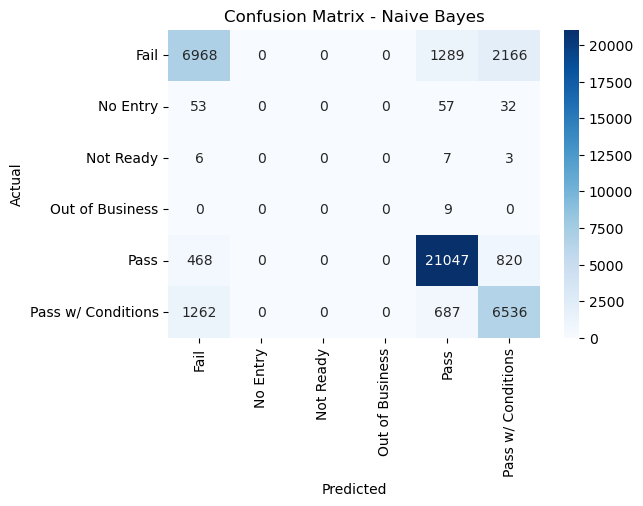


Model: Logistic Regression
                    precision    recall  f1-score   support

              Fail       0.89      0.84      0.86     10423
          No Entry       0.00      0.00      0.00       142
         Not Ready       0.00      0.00      0.00        16
   Out of Business       0.00      0.00      0.00         9
              Pass       0.96      0.99      0.97     22335
Pass w/ Conditions       0.86      0.85      0.86      8485

          accuracy                           0.92     41410
         macro avg       0.45      0.45      0.45     41410
      weighted avg       0.92      0.92      0.92     41410



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


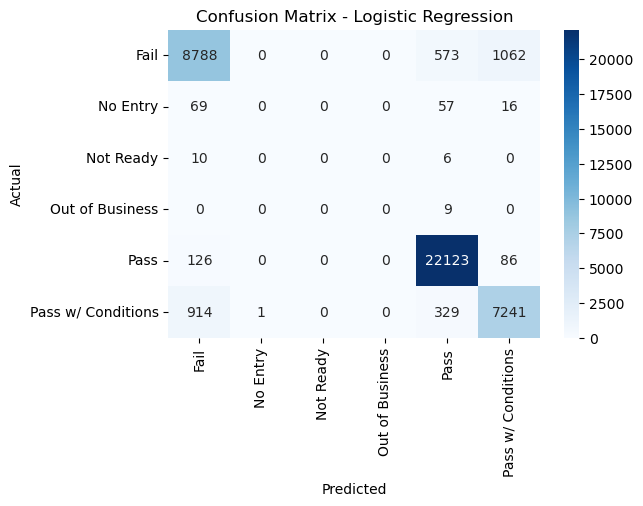


Model: Random Forest
                    precision    recall  f1-score   support

              Fail       0.90      0.85      0.88     10423
          No Entry       0.17      0.10      0.12       142
         Not Ready       0.33      0.12      0.18        16
   Out of Business       0.00      0.00      0.00         9
              Pass       0.97      0.99      0.98     22335
Pass w/ Conditions       0.87      0.87      0.87      8485

          accuracy                           0.93     41410
         macro avg       0.54      0.49      0.51     41410
      weighted avg       0.93      0.93      0.93     41410



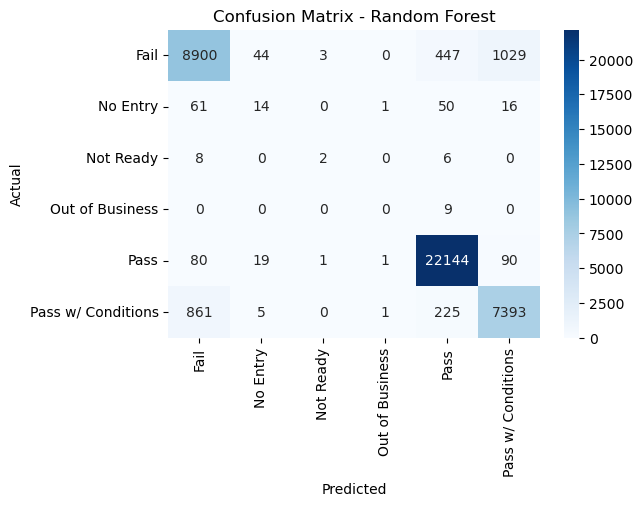

In [33]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, target_names = label_encoder.classes_))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #visualization
    plt.figure (figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Random Forest has the greatest overall accuracy (93%) and the best macro F1-score(0.51). Logistic Regression performed almost as well with similar scores across the classes. All three classifiers struggled with the minority classes ("No Entry", "Not Ready", and "Out of Business"), but while Naive Bayes and Logistic Regression completely failed in this classification, Random Forest did do slightly better. Seeing this, we can conclude that Random Forest is the most rubust model of the three.

Seeing how the the class imbalance was clearly an issue, I would next focus on addressing this using SMOTE or a different technique than TF-IDF.